## Inspect the Dataset

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [1]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [2]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory: ")
print(os.listdir(base_dir))

print('\nContents of train directory: ')
print(os.listdir(f'{base_dir}/train'))

print('\nContents of validation directory: ')
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory: 
['train', 'validation', 'vectorize.py']

Contents of train directory: 
['cats', 'dogs']

Contents of validation directory: 
['cats', 'dogs']


In [3]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Build the model

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [8]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Preprocessing Data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                     batch_size=20,
                                                     class_mode='binary',
                                                     target_size=(150, 150))

test_generator = train_datagen.flow_from_directory(validation_dir, 
                                                     batch_size=20,
                                                     class_mode='binary',
                                                     target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Train the model

In [11]:
history = model.fit(train_generator, 
                    epochs=15,
                    validation_data=test_generator, 
                    verbose=1)

Epoch 1/15
100/100 [==============================] - 31s 300ms/step - loss: 0.7599 - accuracy: 0.5200 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/15
100/100 [==============================] - 22s 218ms/step - loss: 0.6627 - accuracy: 0.6060 - val_loss: 0.6255 - val_accuracy: 0.6480
Epoch 3/15
100/100 [==============================] - 22s 219ms/step - loss: 0.5932 - accuracy: 0.7010 - val_loss: 0.6220 - val_accuracy: 0.6690
Epoch 4/15
100/100 [==============================] - 19s 194ms/step - loss: 0.5321 - accuracy: 0.7455 - val_loss: 0.6011 - val_accuracy: 0.6670
Epoch 5/15
100/100 [==============================] - 19s 191ms/step - loss: 0.4710 - accuracy: 0.7665 - val_loss: 0.5206 - val_accuracy: 0.7390
Epoch 6/15
100/100 [==============================] - 19s 193ms/step - loss: 0.3937 - accuracy: 0.8235 - val_loss: 0.5539 - val_accuracy: 0.7340
Epoch 7/15
100/100 [==============================] - 19s 193ms/step - loss: 0.3164 - accuracy: 0.8640 - val_loss: 0.6178 - val_ac

In [16]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

path = 'cat.2000.jpg'
img = load_img(path, target_size=(150, 150))

x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0] <= 0.5:
    print("It's a cat")
else:
    print("Its a dog")

1/1 [==============================] - 0s 26ms/step
[2.0510328e-08]
It's a cat


## Plot Ulities

In [22]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

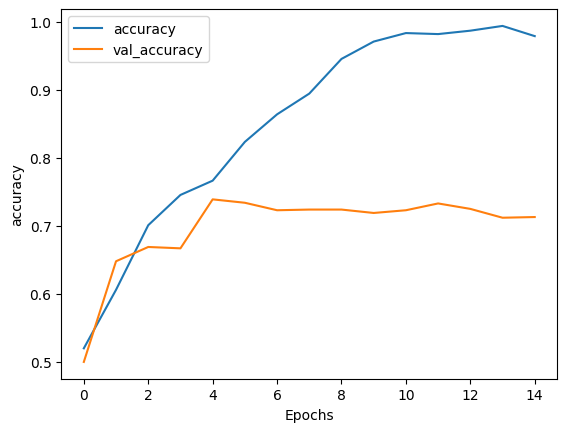

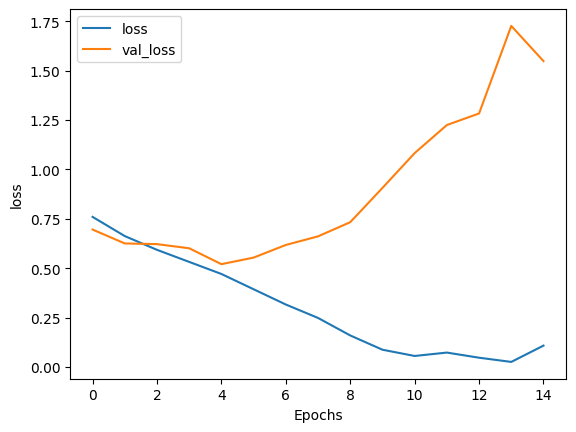

In [23]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Visualize Convolutional Effect

1/1 [==============================] - 0s 93ms/step


C:\Users\BACHLONG\AppData\Local\Temp\ipykernel_20660\3616218907.py:51: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
C:\Users\BACHLONG\AppData\Local\Temp\ipykernel_20660\3616218907.py:54: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


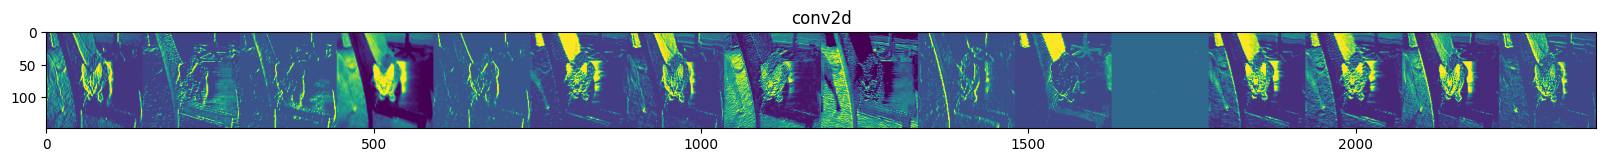

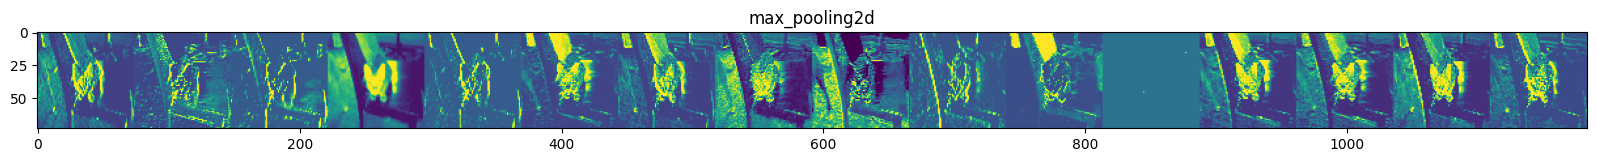

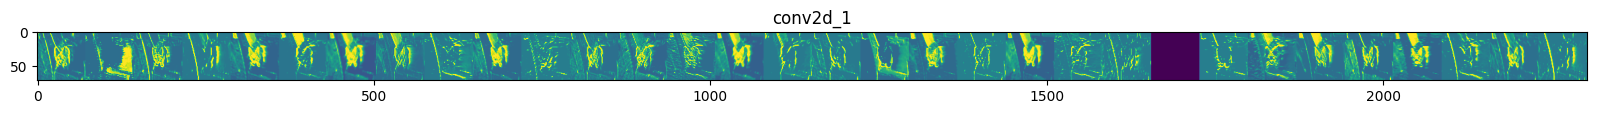

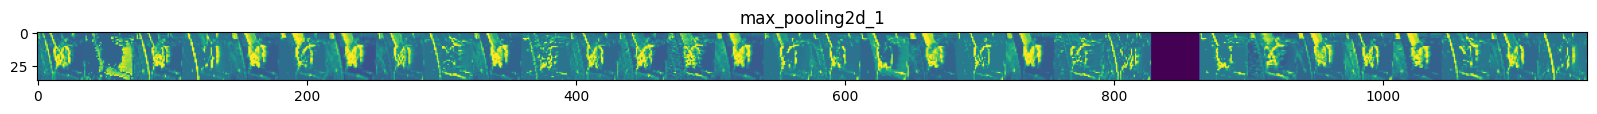

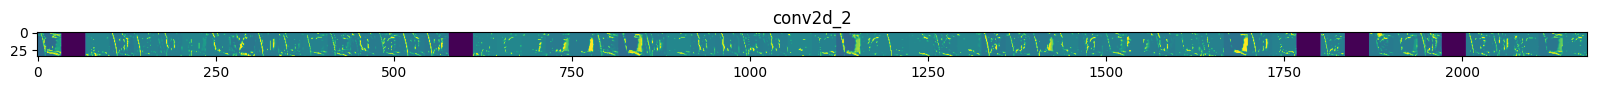

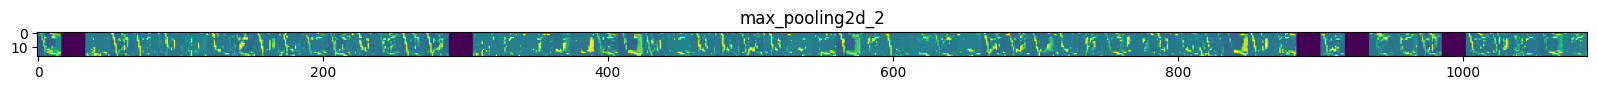

In [25]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 